In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('CLEAN_FIFA23_official_data.csv')

In [42]:
df.shape

(17660, 31)

In [43]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value(£)', 'Wage(£)',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height(cm.)',
       'Weight(lbs.)', 'Release Clause(£)', 'Kit Number',
       'Best Overall Rating', 'Year_Joined'],
      dtype='object')

In [44]:
df.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value(£)                    float64
Wage(£)                     float64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until        float64
Height(cm.)                 float64
Weight(lbs.)                float64
Release Clause(£)           

In [45]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Position,Joined,Loaned From,Contract Valid Until,Height(cm.),Weight(lbs.),Release Clause(£),Kit Number,Best Overall Rating,Year_Joined
0,0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,...,SUB,2018-07-01,NaN,2026.0,189.0,180.810,157000000.0,8.0,0.0,2018
1,1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,...,LCM,2020-01-30,NaN,2026.0,179.0,152.145,155000000.0,8.0,0.0,2020
2,2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,...,LB,2020-09-14,NaN,2024.0,172.0,152.145,97700000.0,19.0,0.0,2020
3,3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,...,RCM,2015-08-30,NaN,2025.0,181.0,154.350,198900000.0,17.0,0.0,2015
4,4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,...,RCM,2020-09-01,NaN,2026.0,172.0,149.940,154400000.0,23.0,0.0,2020


In [46]:
df = df[['ID', 'Name', 'Age', 'Nationality',
       'Overall', 'Club', 'Value(£)', 'Preferred Foot','Position',
       'Height(cm.)', 'Weight(lbs.)','Kit Number',
       'Best Overall Rating']]

In [47]:
df = df.set_index('ID')


Find the average age of all the players.

In [48]:
average_age = np.mean(df['Age'])
print(average_age)

23.127746319365798


Calculate the total value of all the players in pounds (£).

In [49]:
total_value_players = np.sum(df['Value(£)'])
print(total_value_players)

48384663000.0


Determine the most common nationality among the players.

In [50]:
nationality_counts = df.groupby('Nationality').size().sort_values(ascending=False)
print(nationality_counts.head(3))

Nationality
England    1531
Germany    1038
Spain       990
dtype: int64


Plot a histogram of player ages.

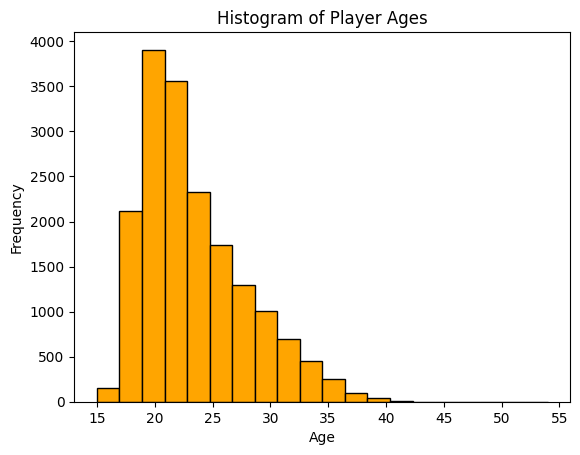

In [51]:
plt.hist(df['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Player Ages')
plt.show()

Create a bar plot showing the top 10 clubs with the most players.

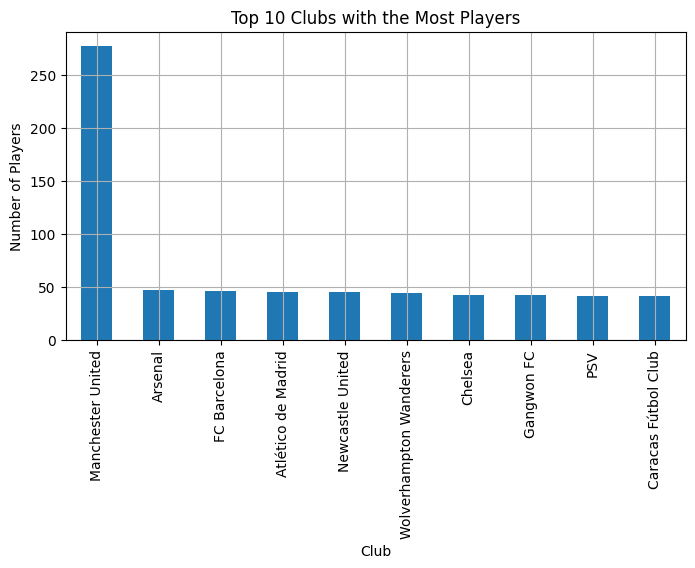

In [52]:
club = df['Club']
counts = club.value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 4))
counts.plot.bar()
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.title('Top 10 Clubs with the Most Players')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

Calculate the average overall rating for players with a preferred foot of "Right" versus "Left".

In [53]:
average_rating = df[df['Preferred Foot'] == 'Right']['Overall'].mean()
print(average_rating)


63.096989231558126


Find the tallest and shortest players in terms of height (cm).

In [54]:
df_height = df['Height(cm.)'].describe()
max = df_height['max']
min = df_height['min']

print(max)
print(min)

206.0
149.0


Create a scatter plot showing the relationship between player overall rating and value.

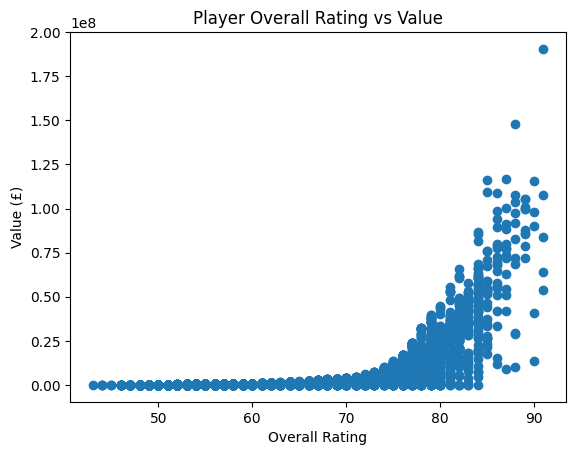

In [55]:
plt.scatter(df['Overall'], df['Value(£)'])
plt.xlabel('Overall Rating')
plt.ylabel('Value (£)')
plt.title('Player Overall Rating vs Value')
plt.show()

Group the players by position and calculate the average overall rating for each position.

In [56]:
average_rating_by_position = df.groupby('Position')['Overall'].mean()
pd.set_option('display.max_rows', None)
print(average_rating_by_position)

Position
CAM    70.377451
CB     70.574074
CDM    70.162162
CF     76.000000
CM     68.040000
GK     70.125000
LAM    71.142857
LB     68.263636
LCB    68.937186
LCM    69.517685
LDM    69.336207
LF     70.500000
LM     68.851449
LS     68.236025
LW     70.127517
LWB    67.285714
RAM    74.666667
RB     68.354740
RCB    68.826281
RCM    69.270769
RDM    68.101562
RES    58.235260
RF     71.428571
RM     68.598592
RS     69.236111
RW     70.183099
RWB    67.517647
ST     70.387283
SUB    63.054275
Name: Overall, dtype: float64


Calculate the correlation between player age and overall rating.

In [57]:
correlation = df['Age'].corr(df['Overall'])
print(correlation)

0.5956901314092926
